# Переобучение и регуляризация

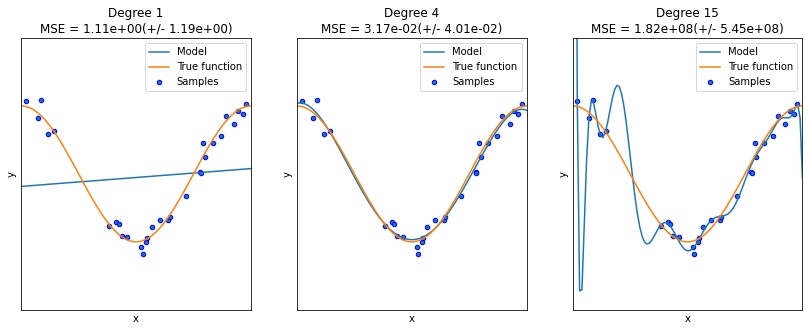

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
#     return np.cos(1.5 * np.pi * X)
    return np.cos(2.0 * np.pi * X)



np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [61]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

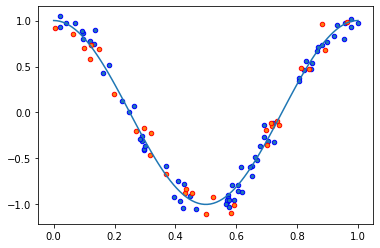

In [63]:
xx = np.linspace(0, 1, 100)

plt.plot(xx, true_fun(xx), label="True function")
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Train")
plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test")

In [66]:
from sklearn.metrics import mean_squared_error

degrees = np.arange(1, 25)
train_scores = np.zeros(len(degrees))
test_scores = np.zeros(len(degrees))

for i, deg in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=deg,
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train.reshape(-1, 1), y_train)
    
    train_scores[i] = mean_squared_error(y_train, pipeline.predict(X_train.reshape(-1, 1)))
    test_scores[i] = mean_squared_error(y_test, pipeline.predict(X_test.reshape(-1, 1)))

Text(0.5, 1.0, 'Overfitting example')

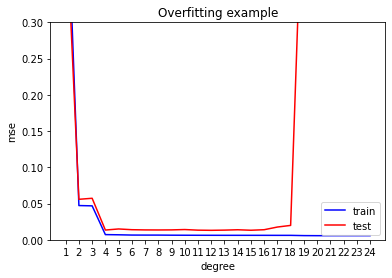

In [68]:
plt.plot(degrees, train_scores, color='b', label='train')
plt.plot(degrees, test_scores, color='r', label='test')
plt.xlabel('degree')
plt.ylabel('mse')
plt.xticks(degrees);
plt.ylim((0.0, 0.3))
plt.legend(loc=4)
plt.title('Overfitting example')

На графике прослеживаются сразу две возможные негативные ситуации: недообучение и переобучение.

In [167]:
Image(url="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Screenshot-2020-02-06-at-11.09.13-1536x876.png")

## Перекрестная валидация (cross-validation)

In [74]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/1400/1*0G9CzbPadQaCXkxrTkqN7A.png")

In [80]:
sklearn.metrics.SCORERS.keys()

NameError: name 'sklearn' is not defined

In [168]:
from sklearn.model_selection import cross_validate

num_folds = 10
cv_scores = np.zeros((len(degrees), num_folds))

for i, deg in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=deg,
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    cv_score = cross_validate(pipeline, X.reshape(-1, 1), y, cv=num_folds, scoring='neg_mean_squared_error')
    cv_scores[i, : ] = cv_score['test_score']

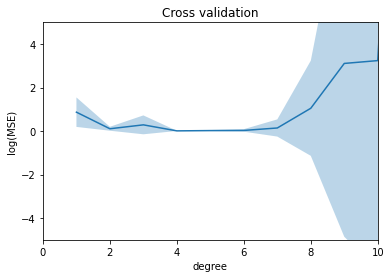

In [176]:
plt.plot(degrees, -cv_scores.mean(axis=1))
plt.fill_between(degrees,
                 -cv_scores.mean(axis=1) - cv_scores.std(axis=1),
                 -cv_scores.mean(axis=1) + cv_scores.std(axis=1),
                 alpha=0.3)
# plt.yscale('log')
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.xlabel('degree')
plt.ylabel('log(MSE)');
plt.title('Cross validation');

## Регуляризация

 ## Ridge регрессия
 
 В данном алгоритме решения задачи регресии функция потерь штрафуется за большие значения коэфициентов гипотезы
 
 $$
     L(\theta) = ||y - \theta^Tx||^2_2 + \alpha ||\theta||^2_2
 $$
 
 Такая форма также называется регуляризацией по Тихонову.

In [163]:
from sklearn.linear_model import Ridge

alpha=0.01

for i, deg in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=deg,
                                             include_bias=True)
    linear_regression = Ridge(alpha)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    cv_score = cross_validate(pipeline, X.reshape(-1, 1), y, cv=num_folds, scoring='neg_mean_squared_error')
    cv_scores[i, : ] = cv_score['test_score']

Text(0.5, 1.0, 'Cross validation')

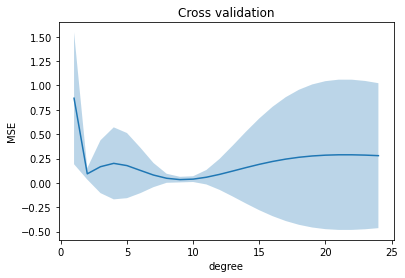

In [164]:
plt.plot(degrees, -cv_scores.mean(axis=1))
plt.fill_between(degrees,
                 -cv_scores.mean(axis=1) - cv_scores.std(axis=1),
                 -cv_scores.mean(axis=1) + cv_scores.std(axis=1),
                 alpha=0.3)
plt.xlabel('degree')
plt.ylabel('MSE');
plt.title('Cross validation')

## Lasso регрессия

В данном виде регресии штрафная функция записана в $l_1$ норме
$$
     L(\theta) = \frac{1}{2n}||y - \theta^Tx||^2_2 + \alpha ||w||_1
$$

In [165]:
from sklearn.linear_model import Lasso

alpha=0.01

for i, deg in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=deg,
                                             include_bias=True)
    linear_regression = Lasso(alpha)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    cv_score = cross_validate(pipeline, X.reshape(-1, 1), y, cv=num_folds, scoring='neg_mean_squared_error')
    cv_scores[i, : ] = cv_score['test_score']

Text(0.5, 1.0, 'Cross validation')

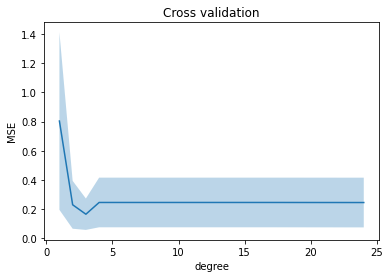

In [166]:
plt.plot(degrees, -cv_scores.mean(axis=1))
plt.fill_between(degrees,
                 -cv_scores.mean(axis=1) - cv_scores.std(axis=1),
                 -cv_scores.mean(axis=1) + cv_scores.std(axis=1),
                 alpha=0.3)
plt.xlabel('degree')
plt.ylabel('MSE');
plt.title('Cross validation')

Разницу между L1 и L2 регуляризациями можно изобрать графически анализирую линии уровня соответсвующих штрафных функций. Для L1 линии уровня будут представлять собой гиперкубы с вершинами, на координатных осях, а для L2 - сферы с центром в нуле.

Рассмотрим пример визуализации для 2-х параметров ($\beta_1$ и $\beta_2$).

Для L1 линии уровня задаются уравнением:
$$
|\beta_1| + |\beta_2| = const,
$$
а для L2
$$
\beta_1^2 + \beta_2^2 = const.
$$

Также схематично изобразим на графике линии уровня для квадратичной ошибки.

In [146]:
Image(url= "https://miro.medium.com/max/1200/1*EqrUyC-bNEpj0xFOnk8jyg.png")


Геометрическая интерпретация этих методо регуляризации позволяет сделать вывод, что для L1 будет выбрана точка, в одной из вершин гиперкуба, что приведет к занулению части коэффициентов.

## Elastic-Net

Данная модель линейной регресси включает в себя оба типа регуляризации L1 и L2. 

Ее функцию потерь можно записать в следующием виде:
$$
L(\theta) = \frac{1}{2n}||X\theta - y||_2^2 + \alpha \rho ||\theta||_1 + \frac{\alpha (1-\rho)}{2}||\theta||_2^2
$$

In [188]:
from sklearn.linear_model import ElasticNet

alpha = 0.01
l1_ratio = 0.1

for i, deg in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=deg,
                                             include_bias=True)
    linear_regression = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    cv_score = cross_validate(pipeline, X.reshape(-1, 1), y, cv=num_folds, scoring='neg_mean_squared_error')
    cv_scores[i, : ] = cv_score['test_score']

Text(0.5, 1.0, 'Cross validation')

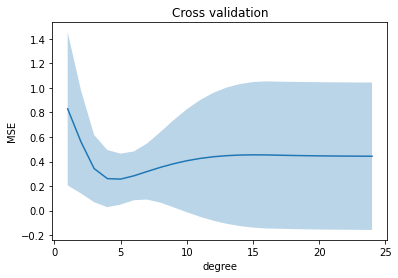

In [189]:
plt.plot(degrees, -cv_scores.mean(axis=1))
plt.fill_between(degrees,
                 -cv_scores.mean(axis=1) - cv_scores.std(axis=1),
                 -cv_scores.mean(axis=1) + cv_scores.std(axis=1),
                 alpha=0.3)
plt.xlabel('degree')
plt.ylabel('MSE');
plt.title('Cross validation')

## Дилемма смещения-дисперсии

In [195]:
Image(url="https://miro.medium.com/max/1062/1*v63L_h5WXGOb4o6oh_daAA.jpeg")

In [193]:
Image(url="https://miro.medium.com/max/1400/1*9hPX9pAO3jqLrzt0IE3JzA.png")

In [194]:
Image(url="https://miro.medium.com/max/1124/1*RQ6ICt_FBSx6mkAsGVwx8g.png")

## Связь смещения и разброса

Предположим, что имеется зависимость $y = f(x) + \epsilon$, которую мы хотим приблизить функцией $\hat f(x)$ по точкам обучающей выборки. Здесь $\epsilon$ - случайный шум с нулевым мат. ожиданием и дисперсией $\sigma^2$.

В предположении, что $\epsilon$ и $\hat f$ независимы
$$
E[(y - \hat f)^2] = E[y^2 +  \hat f ^2 - 2y\hat f]  = \\
E[y^2] + E[\hat f^2] - 2 E[y\hat f] =  \\
Var[y] + E[y^2] + Var[\hat f] + E[\hat f^2] - 2 E[y]E[\hat f] = \\
(E[y^2] - 2E[y]E[\hat f] + E[\hat f]) + Var[\hat f] + Var[y] = \\
(E[y] - E[\hat f])^2 + Var[\hat f] + Var[y]= \\
Bias[\hat f]^2 + Var[\hat f] + \sigma^2.
$$

Суммарная ошибка прогноза = Смещение^2 + Разброс + Неустранимая ошибка